- door_to_ecg_min와 PCI_flag 누락 ..
- cohort 수정 후에 최종 eda 가능




구글 드라이브에 마운트

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##DATA EDA
"ED 지연 요인(lab/boarding 등)이 재관류 지연(door_to_cath_min)에 어떤 패턴으로 연결되는가” 를 탐색

ydata-profiling 패키지 설치

In [2]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


종합 EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# 파일 로드
final_cohort = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2025-2 데이터애널리틱스/final_cohort_with_death_los.csv')

# 확인
print(final_cohort.shape)
print(final_cohort.columns)
display(final_cohort.head())

# EDA 리포트 생성
profile = ProfileReport(
    final_cohort,
    title="STEMI ED Delay Analysis (final_cohort)",
    explorative=True,  # 상관관계, 상호작용 등 확장된 분석 활성화
    minimal=False,     # False면 전체 분석 포함
)

# 리포트 표시 (Colab 내에서 바로 렌더링)
profile.to_notebook_iframe()

# HTML로 저장
profile.to_file("/content/drive/MyDrive/Colab Notebooks/2025-2 데이터애널리틱스/final_cohort_EDA_report.html")

Output hidden; open in https://colab.research.google.com to view.

기본 요약 및 데이터 전처리 점검

In [8]:
# 결측치 비율
missing = final_cohort.isnull().mean().sort_values(ascending=False)
print("<결측치 비율>")
print(missing)

# 수치형 변수 기술통계
num_summary = final_cohort.describe().T
display(num_summary)

# 변수별 dtype 확인
print(final_cohort.dtypes)

<결측치 비율>
door_to_cath_min              0.404301
door_to_antithrombotic_min    0.350538
lab_tat_min                   0.066667
hadm_id                       0.000000
subject_id                    0.000000
admittime                     0.000000
outtime                       0.000000
intime                        0.000000
boarding_delay_min            0.000000
death_flag                    0.000000
los_days                      0.000000
transfer_type                 0.000000
is_emergency_admission        0.000000
dtype: float64


,count,mean,std,min,25%,50%,75%,max
subject_id,465.0,1.505082e+07,2.861360e+06,10013310.00,12513536.0,15013421.00,1.761068e+07,19991743.0
hadm_id,465.0,2.497733e+07,2.802694e+06,20022560.00,22752888.0,24979998.00,2.735731e+07,29988505.0
lab_tat_min,434.0,1.105945e+02,1.036535e+02,46.00,73.0,87.25,1.088750e+02,1144.0
door_to_antithrombotic_min,302.0,9.871821e+02,2.182751e+03,73.00,237.5,363.00,6.555000e+02,22243.0
door_to_cath_min,277.0,3.599134e+02,6.128890e+02,30.00,117.0,175.00,2.870000e+02,4044.0
boarding_delay_min,465.0,-2.982986e+01,7.759910e+01,-1285.00,-37.0,-2.00,-1.216667e+00,69.0
death_flag,465.0,5.591398e-02,2.300030e-01,0.00,0.0,0.00,0.000000e+00,1.0
los_days,465.0,4.728000e+00,4.892571e+00,-0.47,2.3,3.12,4.990000e+00,42.8
is_emergency_admission,465.0,8.064516e-01,3.955045e-01,0.00,1.0,1.00,1.000000e+00,1.0


subject_id                      int64
hadm_id                         int64
intime                         object
outtime                        object
admittime                      object
lab_tat_min                   float64
door_to_antithrombotic_min    float64
door_to_cath_min              float64
boarding_delay_min            float64
death_flag                      int64
los_days                      float64
transfer_type                  object
is_emergency_admission          int64
dtype: object


ED lab TAT 시각화
- 검체 채취 → 결과 보고까지 걸린 시간
- ED 내부 지연

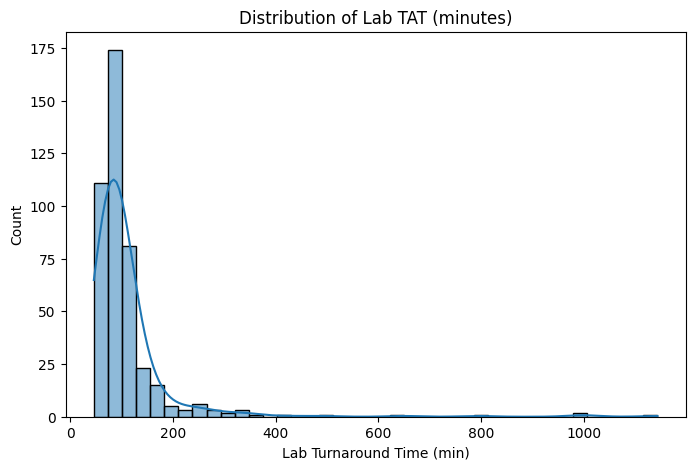

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(final_cohort['lab_tat_min'], bins=40, kde=True)
plt.title('Distribution of Lab TAT (minutes)')
plt.xlabel('Lab Turnaround Time (min)')
plt.ylabel('Count')
plt.show()

ED 지연 vs 시술 지연

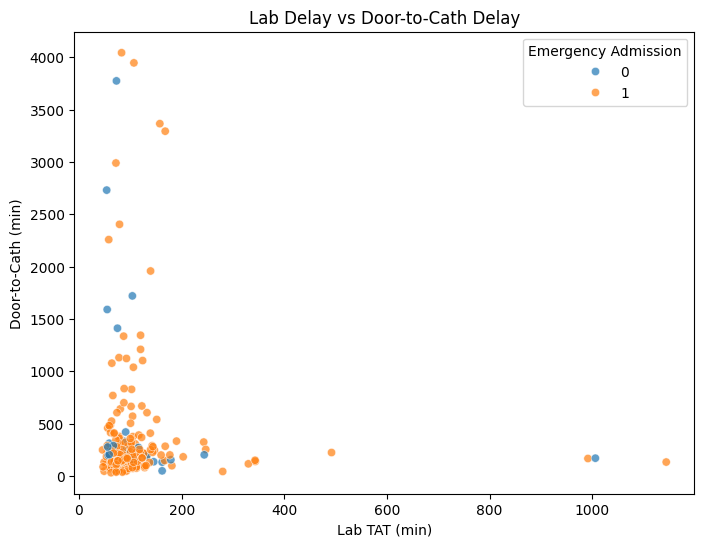

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=final_cohort,
    x='lab_tat_min', y='door_to_cath_min',
    hue='is_emergency_admission', alpha=0.7
)
plt.title('Lab Delay vs Door-to-Cath Delay')
plt.xlabel('Lab TAT (min)')
plt.ylabel('Door-to-Cath (min)')
plt.legend(title='Emergency Admission')
plt.show()

상관관계행렬

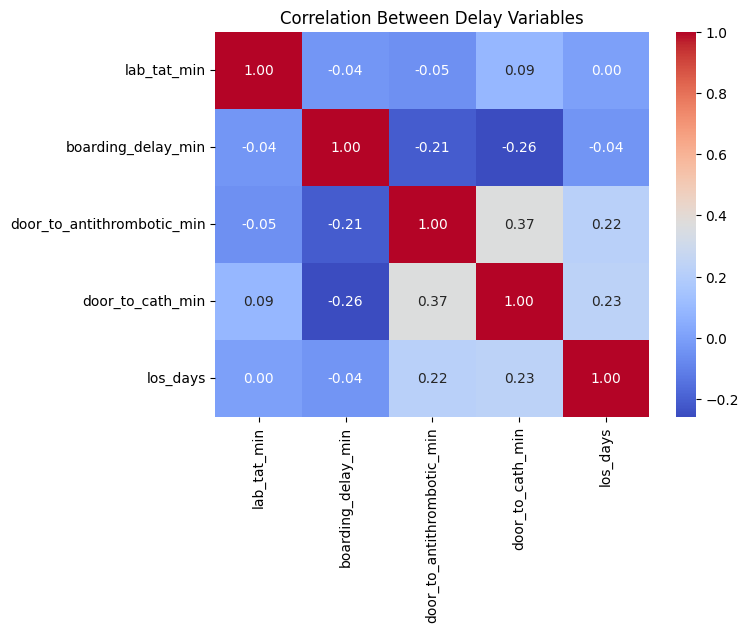

In [14]:
corr_vars = ['lab_tat_min', 'boarding_delay_min',
              'door_to_antithrombotic_min', 'door_to_cath_min',
              'los_days']

corr = final_cohort[corr_vars].corr(method='spearman')
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Delay Variables')
plt.show()

ED 지연 정도에 따른 사망률

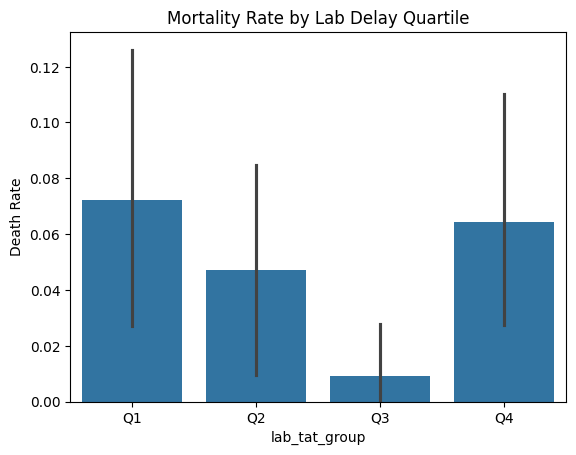

In [12]:
# 사분위수 기준 그룹화
final_cohort['lab_tat_group'] = pd.qcut(final_cohort['lab_tat_min'], q=4, labels=['Q1','Q2','Q3','Q4'])
sns.barplot(data=final_cohort, x='lab_tat_group', y='death_flag', estimator=np.mean)
plt.title('Mortality Rate by Lab Delay Quartile')
plt.ylabel('Death Rate')
plt.show()

Boarding Delay(ED 체류 지연)의 영향
- 응급입원 vs 비응급입원 간 ED 체류시간 차이 비교

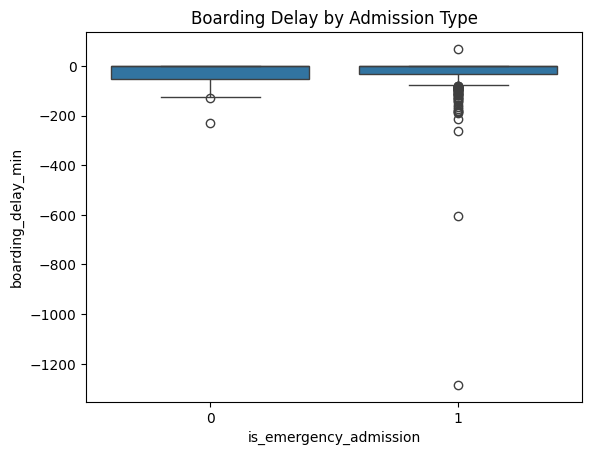

In [13]:
sns.boxplot(data=final_cohort, x='is_emergency_admission', y='boarding_delay_min')
plt.title('Boarding Delay by Admission Type')
plt.show()